# Template Matching

Follow the guide from [OpenCV Tutorial](https://docs.opencv.org/4.x/de/da9/tutorial_template_matching.html)

Template matching is a technique for finding areas of an image that match (are similar) to a template image (patch).

While the patch must be a rectangle it may be that not all of the rectangle is relevant. In such a case, a mask can be used to isolate the portion of the patch that should be used to find the match.

We need two primary components:

1. Source image (I): The image in which we expect to find a match to the template image
2. Template image (T): The patch image which will be compared to the source image

our goal is to detect the highest matching area: <img src='https://docs.opencv.org/4.x/Template_Matching_Template_Theory_Summary.jpg'>

To identify the matching area, we have to compare the template image against the source image by sliding it: 

By sliding, we mean moving the patch one pixel at a time (left to right, up to down). At each location, a metric is calculated so it represents how "good" or "bad" the match at that location is (or how similar the patch is to that particular area of the source image).

One way to perform template matching on color images is to decompose the pixels into their color components and measure the quality of match between the color template and search image using the sum of the SAD computed for each color separately.


In [32]:
from __future__ import print_function
import sys
import cv2 
import cvutils

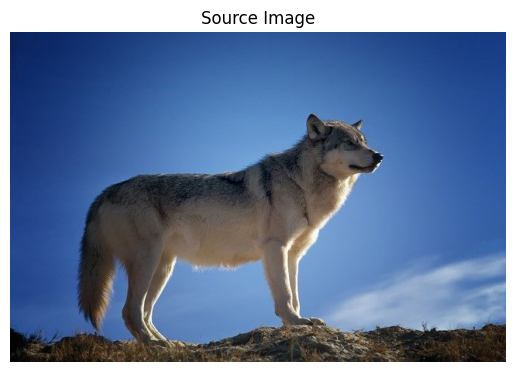

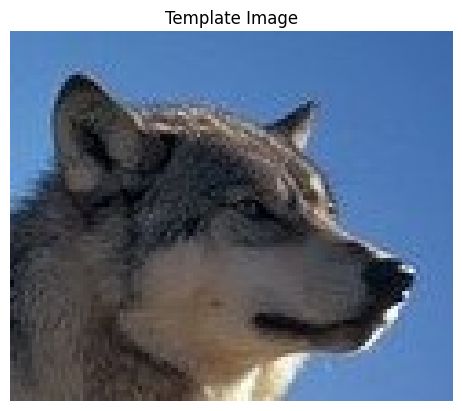

In [33]:
# Load the images
img = 'wolf.jpg'
templ = 'wolf_template.jpg'
img = cv2.imread(img)
templ = cv2.imread(templ)
# Display the images
cvutils.imshow("Source Image", img)
cvutils.imshow("Template Image", templ)


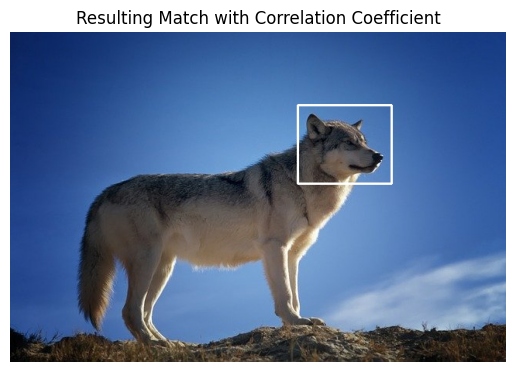

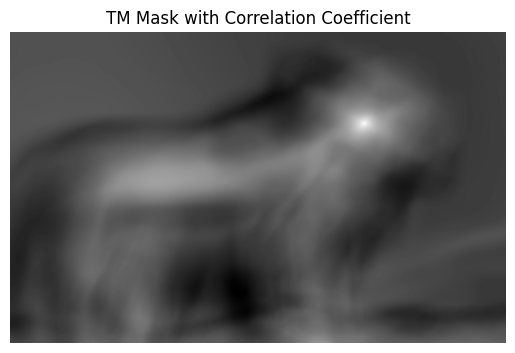

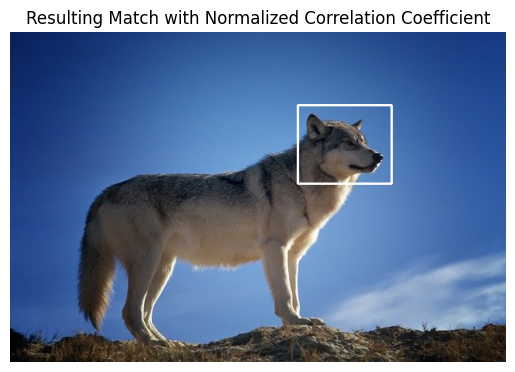

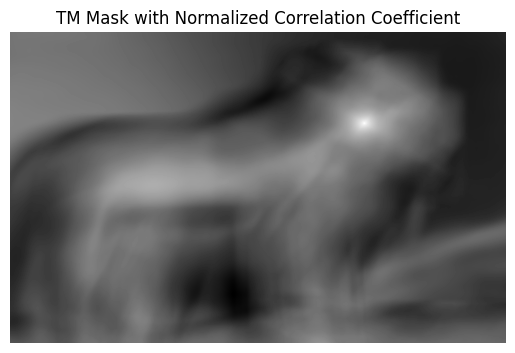

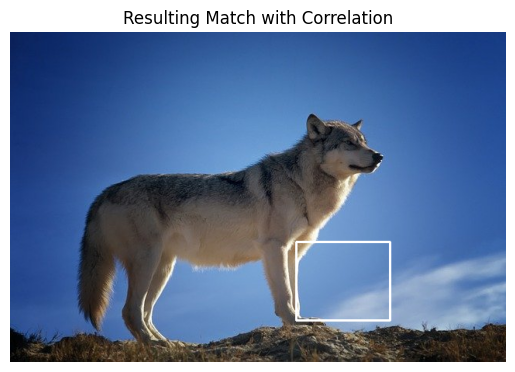

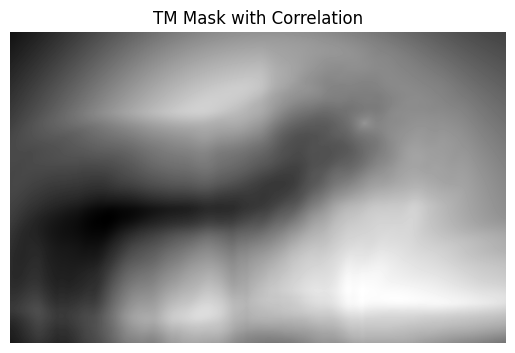

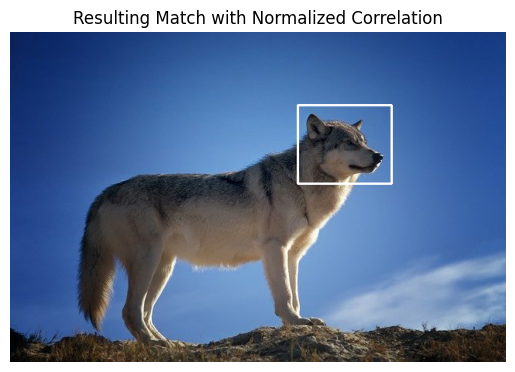

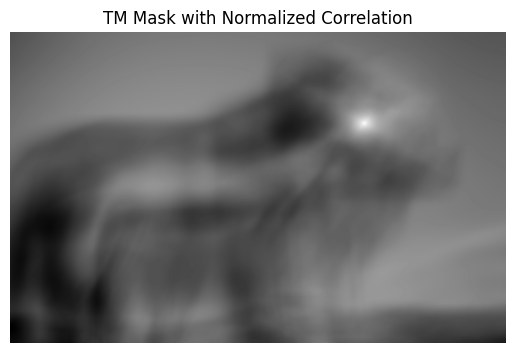

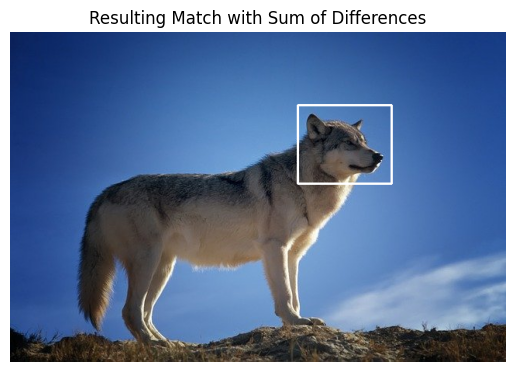

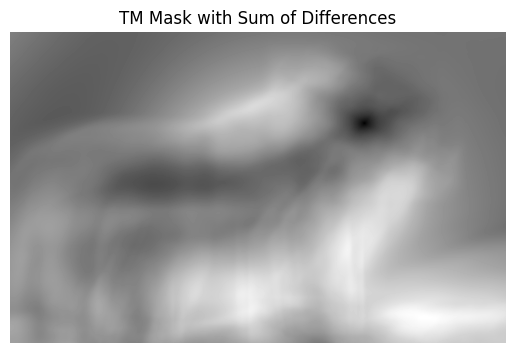

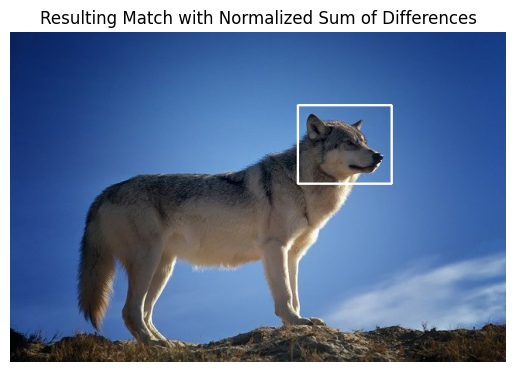

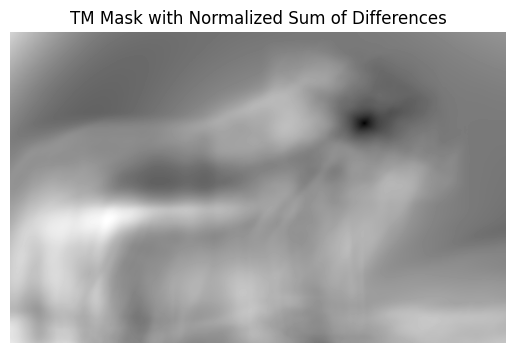

In [34]:
# List to all the Template Matching methods
methods = (cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED,
           cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED)
# Names of all the methods for template matching
methods_names = ("Correlation Coefficient", "Normalized Correlation Coefficient", "Correlation", 
                 "Normalized Correlation", "Sum of Differences", "Normalized Sum of Differences")
# For each method in the list above perform template matching
for index, method in enumerate(methods):
    # Get the Template Matching Mask
    result = cv2.matchTemplate(img, templ, method)
        # ->  This returns us with result which is the grayscale image where pixel intensities show the match for the image.
        # a Greyscale image with brighter elements if it is close and darker if it is far away. 
    # Get the location of the global minima and maxima
    # Minima Co-ordinates are in minLoc and Maxima Co-ordinates are in maxLoc
    _, _, minLoc, maxLoc = cv2.minMaxLoc(result)
    # In Sum of Squared Difference, we need to look for minimas  
    # In Correlation Coefficient, we need to look for maximas
    # In Correlation, we need to look for maximas
    if method in (cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED):
        top_left = minLoc
    else:
        top_left = maxLoc
    # Get the bottom right co-ordinate
    bottom_right = (top_left[0]+templ.shape[1], top_left[1]+templ.shape[0]) 
    # Draw the matched template on the input image and display it 
    im_display = img.copy()
    cv2.rectangle(im_display, top_left, bottom_right, (255,255,255), 2)
    cvutils.imshow("Resulting Match with {}".format(methods_names[index]), im_display)
    # Display the template matching mask
    cvutils.imshow("TM Mask with {}".format(methods_names[index]), result)